In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

In [165]:
data=scipy.io.loadmat('ex7data2.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [166]:
x=data['X']
x.shape

(300, 2)

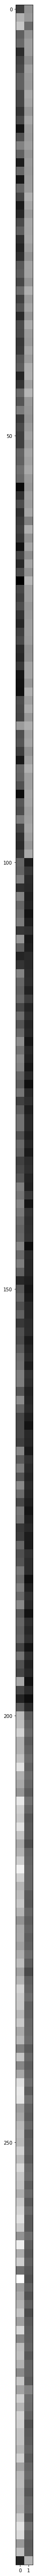

In [167]:
plt.figure(figsize=(100,100))
plt.imshow(x, cmap="gray")
plt.show()

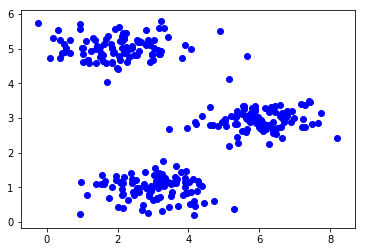

In [168]:
for i in range(0,300):
    plt.scatter(x[i][0],x[i][1],color='b')

In [169]:
centroid=np.random.randint(0,7,(3,2))*1.0
centroid

array([[5., 4.],
       [0., 4.],
       [2., 4.]])

In [170]:
a=np.zeros((300,1))
type(a)

numpy.ndarray

In [171]:
def assign(a,b,centroid):
    max1=10000000
    ind=0
    for i in range(0,3):
        max2=(centroid[i][0]-a)**2+(centroid[i][1]-b)**2;
        if max2<max1:
            max1=max2
            ind=i
    return ind

In [172]:
def assign_centroid(x,centroid,n):
    for i in range (0,n):
        a[i]=assign(x[i][0],x[i][1],centroid)
    return a

In [173]:
def cal_cost(x,a,centroid,n):
    cost=0
    for i in range(0,n):
        if(a[i]==0):
            cost+=(centroid[0][0]-x[i][0])**2+(centroid[0][1]-x[i][1])**2
        if(a[i]==1):
            cost+=(centroid[1][0]-x[i][0])**2+(centroid[1][1]-x[i][1])**2
        if(a[i]==2):
            cost+=(centroid[2][0]-x[i][0])**2+(centroid[2][1]-x[i][1])**2
    cost/=n
    return cost

In [176]:
def update_centroid(a,x,centroid):
    centroid1=np.zeros((3,2))*1.0
    z0=0
    z1=0
    z2=0
    for i in range(0,200):
        if(a[i]==0):
            centroid1[0][0]+=x[i][0]
            centroid1[0][1]+=x[i][1]
        if a[i]==1:
            centroid1[1][0]+=x[i][0]
            centroid1[1][1]+=x[i][1]
        if(a[i]==2):
            centroid1[2][0]+=x[i][0]
            centroid1[2][1]+=x[i][1]
        if(a[i]==0):
            z0=z0+1
        if(a[i]==1):
            z1=z1+1
        if(a[i]==2):
            z2+=1
        if(z0==0):
            z0=1
        if(z1==0):
            z1=1
        if(z2==0):
            z2=1
    centroid[0][0]=centroid1[0][0]/z0
    centroid[0][1]=centroid1[0][1]/z0
    centroid[1][0]=centroid1[1][0]/z1
    centroid[1][1]=centroid1[1][1]/z1
    centroid[2][0]=centroid1[2][0]/z2
    centroid[2][1]=centroid1[2][1]/z2
    return centroid

In [178]:
from sklearn.model_selection import train_test_split

In [191]:
r_cost=-1
for i in range(0,20):
    x=data['X']
    x_train,x_test=train_test_split(x,test_size=0.333)
    centroid=np.random.randint(0,7,(3,2))*1.0
    a=np.zeros((200,1))
    for j in range(0,50):
        a=assign_centroid(x_train,centroid,200)
        cost=cal_cost(x_train,a,centroid,200)
        centroid=update_centroid(a,x_train,centroid)
        if(j%50==0):
            print(i,centroid)
    a1=assign_centroid(x_test,centroid,100)
    cost1=cal_cost(x_test,a,centroid,100)
    if r_cost==-1 or r_cost<cost1:
        r_cost=cost1
        r_centroid=centroid
print(r_cost,r_centroid)

0 [[5.98808003 2.84309965]
 [1.92353337 4.9771601 ]
 [3.02791396 1.11842785]]
1 [[0.99688452 4.77220603]
 [4.82436031 3.66149374]
 [2.96895009 0.94977213]]
2 [[3.57750977 1.20567186]
 [6.14786741 3.2200726 ]
 [1.71982675 4.29655167]]
3 [[2.918242   0.97926592]
 [5.3379699  3.3420648 ]
 [1.55107852 5.0139505 ]]
4 [[2.44402166 2.75335398]
 [4.88557417 3.671386  ]
 [2.19775544 2.59538061]]
5 [[3.20123794 1.12420809]
 [4.51710696 3.8821441 ]
 [0.98945974 4.71779343]]
6 [[3.06032193 0.95759424]
 [1.47257646 4.89260342]
 [5.28717273 3.49328307]]
7 [[1.45307326 4.8840664 ]
 [6.08923725 2.93393689]
 [3.09158418 2.19288551]]
8 [[3.24541343 1.46776669]
 [5.38709449 3.44191742]
 [1.69139531 4.92755676]]
9 [[1.95916921 4.93989197]
 [2.14405092 0.9242535 ]
 [4.94305835 2.16305422]]
10 [[2.45539901 2.25603474]
 [0.         0.        ]
 [4.9870128  3.57230473]]
11 [[1.9218156  4.93432172]
 [4.634116   2.07016148]
 [0.         0.        ]]
12 [[1.87135191 5.03801646]
 [3.86977829 1.65661189]
 [6.33466

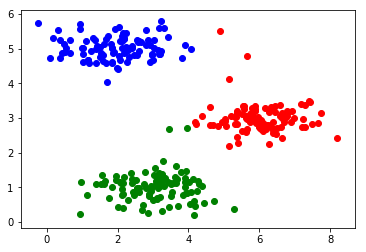

In [195]:
a=np.zeros((300,1))
a2=assign_centroid(x,centroid,300)
for i in range(0,300):
    if(a2[i]==0):
        plt.scatter(x[i][0],x[i][1],color='b')
    if(a2[i]==1):
        plt.scatter(x[i][0],x[i][1],color='r')
    if(a2[i]==2):
        plt.scatter(x[i][0],x[i][1],color='g')